# <a id='home'>Table of Contents</a>

<a href='#section1'>1. Data Processing</a>

<a href='#section2'>2. Connecting to SQL</a>

<a href='#section3'>3. Data Analysis and Visualization</a>

<a href='#section4'>4. Data Analysis Using SQL</a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.markers as markers
from datetime import datetime as dt
import os
#pd.set_option('display.max_rows', 1000)

## <a id='section1'>1. Data Processing</a>

<a href='#home'>Home</a>

In [38]:
# Create dataframe from CSV
# parse_dates argument automatically converts data to datetime64

df = pd.read_csv(os.path.abspath('amazon_purchases.csv'), parse_dates=['Order Date', 'Shipment Date'])
df.head()

,Order ID,Order Date,Category,Website,Condition,Seller,List Price Per Unit,Purchase Price Per Unit,Quantity,Shipment Date,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99


In [39]:
# The dataframe has 978 rows and 14 columns

df.shape

(978, 14)

In [40]:
# Prices are strings so they must be changed to floats.
# Note how dates were changed due to using parse_dates when reading CSV.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order ID                        978 non-null    int64         
 1   Order Date                      978 non-null    datetime64[ns]
 2   Category                        896 non-null    object        
 3   Website                         978 non-null    object        
 4   Condition                       956 non-null    object        
 5   Seller                          966 non-null    object        
 6   List Price Per Unit             978 non-null    object        
 7   Purchase Price Per Unit         978 non-null    object        
 8   Quantity                        978 non-null    int64         
 9   Shipment Date                   967 non-null    datetime64[ns]
 10  Carrier Name & Tracking Number  954 non-null    object        
 11  Item S

In [41]:
# Rename columns to remove spaces.
df.columns = df.columns.str.replace(' ', '')

# Rename specific columns.
df = df.rename(
    columns = {
        'CarrierName&TrackingNumber':'Carrier', 
        'ItemSubtotalTax':'Tax', 
        'ShipmentDate':'ShipDate'
    }
)
df.head()

,OrderID,OrderDate,Category,Website,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99


In [42]:
# Drop unnecessary columns

del df['Website']

In [43]:
# Count NaN occurances

df.isna().sum()

OrderID                  0
OrderDate                0
Category                82
Condition               22
Seller                  12
ListPricePerUnit         0
PurchasePricePerUnit     0
Quantity                 0
ShipDate                11
Carrier                 24
ItemSubtotal             0
Tax                      0
ItemTotal                0
dtype: int64

In [44]:
# Replace NaN

df.Category.fillna('unknown', inplace = True)
df.Condition.fillna('unknown', inplace = True)
df.Carrier.fillna('unknown', inplace = True)
df.Seller.fillna('unknown', inplace = True)

In [45]:
# We have too many categories so let's reduce them for simpler analysis.

df['Category'].nunique()

114

In [46]:
df['Category'].unique()

array(['ABIS_BOOK', 'BEAUTY', 'HAIR_STYLING_AGENT', 'unknown',
       'HEALTH_PERSONAL_CARE', 'OUTDOOR_RECREATION_PRODUCT',
       'NETWORKING_DEVICE', 'COMPUTER_DRIVE_OR_STORAGE', 'COMPUTER',
       'BATTERY', 'COMPUTER_COMPONENT', 'MULTIFUNCTION_DEVICE',
       'OUTDOOR_LIVING', 'OFFICE_PRODUCTS', 'CABLE_OR_ADAPTER', 'GROCERY',
       'HOME', 'COMPUTER_INPUT_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON',
       'PERSONAL_CARE_APPLIANCE', 'KITCHEN', 'FLASH_MEMORY',
       'NOTEBOOK_COMPUTER', 'MEMORY_READER', 'AMAZON_BOOK_READER',
       'WIRELESS_ACCESSORY', 'TOOLS', 'PROFESSIONAL_HEALTHCARE',
       'ELECTRONIC_CABLE', 'RAM_MEMORY', 'SEEDS_AND_PLANTS',
       'ABIS_GIFT_CARD', 'INK_OR_TONER', 'SOFTWARE',
       'SURVEILANCE_SYSTEMS', 'SECURITY_CAMERA', 'SCANNER', 'MONITOR',
       'HOME_LIGHTING_ACCESSORY', 'SOCKSHOSIERY', 'SHIRT', 'CAMCORDER',
       'ART_AND_CRAFT_SUPPLY', 'POWER_SUPPLIES_OR_PROTECTION', 'TUNER',
       'CELLULAR_PHONE', 'CONSUMER_ELECTRONICS', 'HARDWARE',
       'ABIS_

In [47]:
# Combine categories

df['Category'] = df['Category'].replace(['NOTEBOOK_COMPUTER','COMPUTER_DRIVE_OR_STORAGE','RAM_MEMORY','TABLET_COMPUTER','MONITOR','COMPUTER_COMPONENT', 'FLASH_MEMORY', 'SOFTWARE', 'INK_OR_TONER', 'COMPUTER_INPUT_DEVICE', 'CABLE_OR_ADAPTER', 'NETWORKING_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON', 'NETWORKING_ROUTER','MEMORY_READER','WIRELESS_ACCESSORY','SCANNER','PRINTER', 'ABIS_DOWNLOADABLE_SOFTWARE'],'COMPUTER')
df['Category'] = df['Category'].replace(['HEADPHONES','SPEAKERS','BATTERY','MULTIFUNCTION_DEVICE','ELECTRONIC_CABLE','SURVEILANCE_SYSTEMS','SECURITY_CAMERA','WATCH','CONSUMER_ELECTRONICS','CE_ACCESSORY','ELECTRONIC_ADAPTER','ELECTRIC_FAN','CAMCORDER','HANDHELD_OR_PDA','TUNER','AMAZON_BOOK_READER','CELLULAR_PHONE','POWER_SUPPLIES_OR_PROTECTION','CAMERA_OTHER_ACCESSORIES','CHARGING_ADAPTER', 'ABIS_ELECTRONICS', 'SYSTEM_POWER_DEVICE'],'ELECTRONICS')
df['Category'] = df['Category'].replace(['HAIR_STYLING_AGENT','PERSONAL_CARE_APPLIANCE','PROFESSIONAL_HEALTHCARE','HEALTH_PERSONAL_CARE','SHAMPOO','VITAMIN','ABIS_DRUGSTORE','BEAUTY', 'DIETARY_SUPPLEMENTS'],'HEALTH_BEAUTY')
df['Category'] = df['Category'].replace(['KITCHEN','SEEDS_AND_PLANTS','HOME_LIGHTING_ACCESSORY','BOTTLE','OUTDOOR_LIVING','ELECTRIC_FAN','TABLECLOTH','COFFEE_MAKER','HOME_BED_AND_BATH','HOME_LIGHTING_AND_LAMPS','SMALL_HOME_APPLIANCES'],'HOME')
df['Category'] = df['Category'].replace(['SHOES','PANTS','SHIRT','SHORTS','OUTERWEAR','SWEATSHIRT','HAT', 'SOCKSHOSIERY','UNDERWEAR','TECHNICAL_SPORT_SHOE'],'APPAREL')
df['Category'] = df['Category'].replace(['OUTDOOR_RECREATION_PRODUCT','SPORTING_GOODS'],'SPORTS_OUTDOOR')
df['Category'] = df['Category'].replace(['TEA','COFFEE'],'GROCERY')
df['Category'] = df['Category'].replace(['AUTO_PART','HARDWARE','AUTO_ACESSORY','PRECISION_MEASURING','BUILDING_MATERIAL','AUTO_ACCESSORY', 'SCREWDRIVER', 'CAR_ALARM', 'MECHANICAL_COMPONENTS', 'TOOLS'],'AUTO_TOOLS')
df['Category'] = df['Category'].replace(['WRITING_INSTRUMENT','PAPER_PRODUCT','BACKPACK','CARRYING_CASE_OR_BAG','CE_CARRYING_CASE_OR_BAG','OFFICE_PRODUCTS'],'OFFICE')
df['Category'] = df['Category'].replace(['ABIS_DVD','TOYS_AND_GAMES','ABIS_MUSIC','DOWNLOADABLE_VIDEO_GAME','ART_AND_CRAFT_SUPPLY'],'ENTERTAINMENT')
df['Category'] = df['Category'].replace(['ABIS_BOOK', 'BOOKS_1973_AND_LATER'],'BOOKS')
df['Category'] = df['Category'].replace(['AV_FURNITURE','CELLULAR_PHONE_CASE','PHONE_ACCESSORY','PET_SUPPLIES','ACCESSORY','BAG','ACCESSORY_OR_PART_OR_SUPPLY', 'LUGGAGE', 'LAB_SUPPLY', 'CADDY', 'ABIS_GIFT_CARD', 'BISS'],'OTHER')
df['Category'] = df['Category'].replace(['','unknown'],'UNKNOWN')

In [48]:
# Categories have been reduced

df['Category'].value_counts()

COMPUTER          190
HEALTH_BEAUTY     182
HOME              103
ELECTRONICS        89
UNKNOWN            82
APPAREL            70
BOOKS              68
OTHER              57
AUTO_TOOLS         45
SPORTS_OUTDOOR     31
OFFICE             31
GROCERY            24
ENTERTAINMENT       6
Name: Category, dtype: int64

In [49]:
# Fix formatting for category names

df['Category'] = df['Category'].str.replace('_', ' & ').str.title()
df.Category.value_counts()

Computer            190
Health & Beauty     182
Home                103
Electronics          89
Unknown              82
Apparel              70
Books                68
Other                57
Auto & Tools         45
Sports & Outdoor     31
Office               31
Grocery              24
Entertainment         6
Name: Category, dtype: int64

In [50]:
# Simplify Condition column

df.Condition.unique()

array(['unknown', 'new', 'used verygood', 'used good', 'used mint'],
      dtype=object)

In [51]:
used = ['used verygood', 'used good', 'used mint']

df.loc[df.Condition.isin(used), 'Condition'] = 'Used'
df.loc[df.Condition == 'unknown', 'Condition'] = 'Unknown'
df.Condition = df.Condition.replace('new', 'New')

In [52]:
# Condition column has been reduced to 3 entries

df.Condition.unique()

array(['Unknown', 'New', 'Used'], dtype=object)

In [53]:
# Simplify Seller column

df.Seller.unique()

array(['Amazon.com', 'SimplyBeautiful', 'Nature and Herbs', 'tabletopart',
       'Hutsell Sports, LLC', 'Super Safety Razors', 'SquareTrade',
       'SB Natural Products', 'Wellica Inc', 'Hahnemann Laboratories',
       'BarleyBlends', 'unknown', 'Black Tie Mercantile',
       'Maple Leaf Nutrition', 'AmeriMed Direct', 'VapeNow', '365USA',
       'DAB Unlimited', 'MYBATTERYSUPPLIER', 'SafetyRazorPlace',
       'Importer520  ( USA Seller )', 'Pro Ebiz', 'BoBotechnic',
       'The Vitamin Shoppe', 'Amazing Deals Online', 'BestDealUSA',
       'pumpstonbooks', 'HTS USA', 'ACC Stop', 'Handy Housewares',
       'NutriPlusTea', 'Cheap Seeds', 'WOWparts', 'TheSmartDigital',
       'Nutricity', 'Creative Square', 'J&R Music and Computer World',
       'Thousandshores Inc', 'Warehouseseller', 'VCT ELECTRONICS',
       'Instapark', 'American Direct Wholesale', 'Sox Shop',
       'Sneakers Seekers', 'MyOfficeInnovations', 'Kinobo', 'Jed Mart',
       'TRAVEL COMMODITY', 'Great Goods, Inc.', 'GOO

In [54]:
df.loc[df.Seller.str.contains('amazon', case=False), 'Seller'].unique()

array(['Amazon.com', 'AmazonWireless', 'Amazon.com Services LLC'],
      dtype=object)

In [55]:
seller_amazon = ['Amazon.com', 'AmazonWireless', 'Amazon.com Services LLC', 'Amazon']

df.loc[df.Seller.isin(seller_amazon), 'Seller'] = 'Amazon'
df.loc[~df.Seller.isin(seller_amazon), 'Seller'] = 'Third Party'

In [56]:
# Seller column has been reduced to 2 entries

df.Seller.unique()

array(['Amazon', 'Third Party'], dtype=object)

In [57]:
# Simplify Carrier column

df['Carrier'].unique()

array(['USPS', 'UPS', 'FEDEX', 'UPS MI', 'unknown', 'ONTRAC',
       'UPS Mail Innovations', 'Mail Innovations', 'FedEx SmartPost',
       'FedEx', 'US Postal Service', 'DHL Global Mail', 'OTHER',
       'China Post', 'DHL', 'HK  POST', 'DHL Global Mail,DHL Global Mail',
       'SMARTPOST', 'LASERSHIP', 'HK POST', '4PX', 'Royal Mail',
       'Hong Kong Post', 'Hongkong', 'Other', 'AMZN_US', 'OSM',
       'Newgistics', 'Yun Express'], dtype=object)

In [58]:
# Combine carriers to eliminate repitition

df['Carrier'] = df['Carrier'].replace('FEDEX', 'FedEx')
df['Carrier'] = df['Carrier'].replace('SMARTPOST', 'FedEx SmartPost')
df['Carrier'] = df['Carrier'].replace('Mail Innovations','UPS Mail Innovations')
df['Carrier'] = df['Carrier'].replace('UPS MI','UPS Mail Innovations')
df['Carrier'] = df['Carrier'].replace('US Postal Service','USPS')
df['Carrier'] = df['Carrier'].replace('DHL Global Mail','DHL')
df['Carrier'] = df['Carrier'].replace('US Postal Service','USPS')
df['Carrier'] = df['Carrier'].replace('AMZN_US', 'AMZN')

In [59]:
mail = ['USPS', 'UPS', 'UPS Mail Innovations', 'FedEx', 'FedEx SmartPost', 'DHL', 'AMZN']
df.loc[~df.Carrier.isin(mail), 'Carrier'] = 'Other'

In [60]:
# Carrier column has been simplified

df['Carrier'].value_counts()

USPS                    337
AMZN                    278
UPS                     187
Other                   127
FedEx                    24
DHL                      12
FedEx SmartPost           8
UPS Mail Innovations      5
Name: Carrier, dtype: int64

In [61]:
# Remove $ and , from price columns

df['ListPricePerUnit'] = df['ListPricePerUnit'].str.replace('$','').str.replace(',','')
df['PurchasePricePerUnit'] = df['PurchasePricePerUnit'].str.replace('$','').str.replace(',','')
df['ItemSubtotal'] = df['ItemSubtotal'].str.replace('$','').str.replace(',','')
df['Tax'] = df['Tax'].str.replace('$','').str.replace(',','')
df['ItemTotal'] = df['ItemTotal'].str.replace('$','').str.replace(',','')

In [62]:
# Convert price columns to float

df['ListPricePerUnit'] = df['ListPricePerUnit'].astype(float)
df['PurchasePricePerUnit'] = df['PurchasePricePerUnit'].astype(float)
df['ItemSubtotal'] = df['ItemSubtotal'].astype(float)
df['Tax'] = df['Tax'].astype(float)
df['ItemTotal'] = df['ItemTotal'].astype(float)

In [63]:
# Drop rows with zero prices

df = df[df.ListPricePerUnit != 0]
df = df[df.PurchasePricePerUnit != 0]
df = df[df.ItemSubtotal != 0]
df = df[df.ItemTotal != 0]

In [64]:
# Previously, we had 978 rows and now we have 783. 

df.shape

(783, 13)

In [65]:
# Change date columns to date objects.
# These commands would be used had we not parsed it dates when reading the csv.
# df_main['OrderDate'] = pd.to_datetime(df_main['OrderDate'])
# df_main['ShipDate'] = pd.to_datetime(df_main['ShipDate'])

In [66]:
df.dtypes

OrderID                          int64
OrderDate               datetime64[ns]
Category                        object
Condition                       object
Seller                          object
ListPricePerUnit               float64
PurchasePricePerUnit           float64
Quantity                         int64
ShipDate                datetime64[ns]
Carrier                         object
ItemSubtotal                   float64
Tax                            float64
ItemTotal                      float64
dtype: object

In [67]:
# Extract year, month, & day and store them in columns in df_main

df['OrderYear'] = df['OrderDate'].dt.year
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderDay'] = df['OrderDate'].dt.day
df['OrderDayIndex'] = df['OrderDate'].dt.dayofweek
df['OrderDayName'] = df['OrderDate'].dt.day_name()

In [68]:
# Drop rows where year = 2020

#df_main = df_main.drop(df_main[df_main['OrderYear'] == 2020].index)
df = df.drop(df[df['OrderDate'].dt.year == 2020].index)
df.tail()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
969,970,2019-12-14,Computer,New,Amazon,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14,5,Saturday
970,971,2019-12-18,Other,New,Third Party,19.99,13.99,1,2019-12-19,AMZN,13.99,0.93,14.92,2019,12,18,2,Wednesday
971,972,2019-12-18,Other,New,Third Party,27.00,12.99,1,2019-12-19,AMZN,12.99,0.86,13.85,2019,12,18,2,Wednesday
972,973,2019-12-19,Other,New,Amazon,50.00,200.00,1,2019-12-19,Other,200.00,0.00,200.00,2019,12,19,3,Thursday
973,974,2019-12-24,Health & Beauty,New,Amazon,24.99,13.59,2,2019-12-26,AMZN,27.18,0.00,27.18,2019,12,24,1,Tuesday


In [69]:
# Last check for null values

df.isna().sum()

OrderID                 0
OrderDate               0
Category                0
Condition               0
Seller                  0
ListPricePerUnit        0
PurchasePricePerUnit    0
Quantity                0
ShipDate                0
Carrier                 0
ItemSubtotal            0
Tax                     0
ItemTotal               0
OrderYear               0
OrderMonth              0
OrderDay                0
OrderDayIndex           0
OrderDayName            0
dtype: int64

In [70]:
# Last check for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 973
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               781 non-null    int64         
 1   OrderDate             781 non-null    datetime64[ns]
 2   Category              781 non-null    object        
 3   Condition             781 non-null    object        
 4   Seller                781 non-null    object        
 5   ListPricePerUnit      781 non-null    float64       
 6   PurchasePricePerUnit  781 non-null    float64       
 7   Quantity              781 non-null    int64         
 8   ShipDate              781 non-null    datetime64[ns]
 9   Carrier               781 non-null    object        
 10  ItemSubtotal          781 non-null    float64       
 11  Tax                   781 non-null    float64       
 12  ItemTotal             781 non-null    float64       
 13  OrderYear           

In [71]:
# Final DataFrame

df.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,Books,Unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,Books,Unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,Books,Unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,Health & Beauty,Unknown,Third Party,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,Health & Beauty,Unknown,Third Party,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


In [103]:
# Now that we have the final DataFrame, we can persist it as a csv.
# Export df to csv without index.
# We will use this csv to import data into MySQL

df.to_csv('amazon_purchases_2.csv', index=False)

## <a id='section2'>2. Connecting to SQL</a>

<a href='#home'>Home</a>

In [104]:
# Now that we have a csv that contains our clean data, we can import it into a SQL database.
# Export df to csv without index.

In [105]:
# dotenv allows us to save passwords in a .env file

from dotenv import load_dotenv

In [106]:
dotenv_local_path = os.path.abspath('.env')
load_dotenv(dotenv_path=dotenv_local_path, verbose=True) 

True

In [107]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [108]:
# sqlalchemy allows us to interact with SQL using Python

import sqlalchemy
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://' + os.environ.get("MYSQL_USER") + ":" + os.environ.get("MYSQL_PASSWORD") + '@localhost:3306/amazon')

In [109]:
# Note that Condition must be wrapped in special characters like backticks since Condition is a reserved SQL keyword.

engine.execute('DROP TABLE IF EXISTS purchases;')

engine.execute("""CREATE TABLE IF NOT EXISTS purchases (
OrderID int not null primary key,
OrderDate date,
Category varchar(50),
`Condition` varchar(50),
Seller varchar(50),
ListPricePerUnit numeric(10,2),
PurchasePricePerUnit numeric(10,2),
Quantity int,
ShipDate date,
Carrier varchar(50),
ItemSubtotal numeric(10,2),
Tax numeric(10,2),
ItemTotal numeric(10,2),
OrderYear int,
OrderMonth int,
OrderDay int,
OrderDayIndex int,
OrderDayName varchar(50));""")

In [110]:
# Required to parse csv to form insert statements

import csv
from sqlalchemy.sql import text

In [111]:
# Insert rows from amazon_purchases_2.csv into MySQL

with open('amazon_purchases_2.csv') as csv_file:
    input_file = csv.reader(csv_file, delimiter = ',')
    next(input_file) # skip header
    for row in input_file:
        s = text("""
            INSERT IGNORE INTO purchases (
            OrderID,
            OrderDate,
            Category,
            `Condition`,
            Seller,
            ListPricePerUnit,
            PurchasePricePerUnit,
            Quantity,
            ShipDate,
            Carrier,
            ItemSubtotal,
            Tax,
            ItemTotal,
            OrderYear,
            OrderMonth,
            OrderDay,
            OrderDayIndex,
            OrderDayName
            ) VALUES (
            :OrderID,
            :OrderDate,
            :Category,
            :Condition,
            :Seller,
            :ListPricePerUnit,
            :PurchasePricePerUnit,
            :Quantity,
            :ShipDate,
            :Carrier,
            :ItemSubtotal,
            :Tax,
            :ItemTotal,
            :OrderYear,
            :OrderMonth,
            :OrderDay,
            :OrderDayIndex,
            :OrderDayName
            );
        """)
        engine.execute(
        s,
        OrderID = row[0],
        OrderDate = row[1],
        Category = row[2],
        Condition = row[3],
        Seller = row[4],
        ListPricePerUnit = row[5],
        PurchasePricePerUnit = row[6],
        Quantity = row[7],
        ShipDate = row[8],
        Carrier = row[9],
        ItemSubtotal = row[10],
        Tax = row[11],
        ItemTotal = row[12],
        OrderYear = row[13],
        OrderMonth = row[14],
        OrderDay = row[15],
        OrderDayIndex = row[16],
        OrderDayName = row[17]
        )

In [112]:
# Let's create our DataFrame again but this time by accessing the data directly from SQL

df = pd.read_sql("SELECT * FROM purchases", con=engine, parse_dates = ['OrderDate', 'ShipDate'])
df.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,Books,Unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,Books,Unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,Books,Unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,Health & Beauty,Unknown,Third Party,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,Health & Beauty,Unknown,Third Party,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               781 non-null    int64         
 1   OrderDate             781 non-null    datetime64[ns]
 2   Category              781 non-null    object        
 3   Condition             781 non-null    object        
 4   Seller                781 non-null    object        
 5   ListPricePerUnit      781 non-null    float64       
 6   PurchasePricePerUnit  781 non-null    float64       
 7   Quantity              781 non-null    int64         
 8   ShipDate              781 non-null    datetime64[ns]
 9   Carrier               781 non-null    object        
 10  ItemSubtotal          781 non-null    float64       
 11  Tax                   781 non-null    float64       
 12  ItemTotal             781 non-null    float64       
 13  OrderYear           

### Easier method of storing clean DataFrame into SQL

In [114]:
# Instead of saving df to amazon_purchases_2.csv and then importing into SQL, we can save df directly to SQL. 
# Simply connect to SQL as we did above and then execute the command below:

df.to_sql('purchases2', con=engine, if_exists = 'replace', index=False)

In [115]:
# Let's confirm that this worked

df2 = pd.read_sql("SELECT * FROM purchases2", con=engine, parse_dates = ['OrderDate', 'ShipDate'])
df2.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,Books,Unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,Books,Unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,Books,Unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,Health & Beauty,Unknown,Third Party,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,Health & Beauty,Unknown,Third Party,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OrderID               781 non-null    int64         
 1   OrderDate             781 non-null    datetime64[ns]
 2   Category              781 non-null    object        
 3   Condition             781 non-null    object        
 4   Seller                781 non-null    object        
 5   ListPricePerUnit      781 non-null    float64       
 6   PurchasePricePerUnit  781 non-null    float64       
 7   Quantity              781 non-null    int64         
 8   ShipDate              781 non-null    datetime64[ns]
 9   Carrier               781 non-null    object        
 10  ItemSubtotal          781 non-null    float64       
 11  Tax                   781 non-null    float64       
 12  ItemTotal             781 non-null    float64       
 13  OrderYear           

## <a id='section3'>3. Data Analysis and Visualization</a>

<a href='#home'>Home</a>

In [117]:
# Load dataframe

df.head()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,Books,Unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.0,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,Books,Unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.0,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,Books,Unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.0,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,Health & Beauty,Unknown,Third Party,6.99,9.39,1,2008-11-07,USPS,9.39,0.0,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,Health & Beauty,Unknown,Third Party,10.99,7.99,1,2008-11-07,USPS,7.99,0.0,7.99,2008,11,6,3,Thursday


In [118]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = df['ItemTotal'].sum()
TotalSpent

30357.41

In [119]:
# Total number of transactions

NumTrans = len(df['ItemTotal'])
NumTrans

781

In [120]:
# Average spent

AvgSpent = TotalSpent/NumTrans
AvgSpent

38.86992317541613

In [121]:
# Use groupby to sum purchases by date

df_DateTotal = df[['OrderDate', 'ItemTotal']]
df_DateTotal = df_DateTotal.groupby('OrderDate')
df_DateTotal = df_DateTotal['ItemTotal'].sum()
df_DateTotal

OrderDate
2008-02-19     38.24
2008-06-03     23.09
2008-11-06     29.86
2008-12-13     25.90
2009-07-18     26.97
               ...  
2019-12-13     23.45
2019-12-14     23.33
2019-12-18     28.77
2019-12-19    200.00
2019-12-24     27.18
Name: ItemTotal, Length: 445, dtype: float64

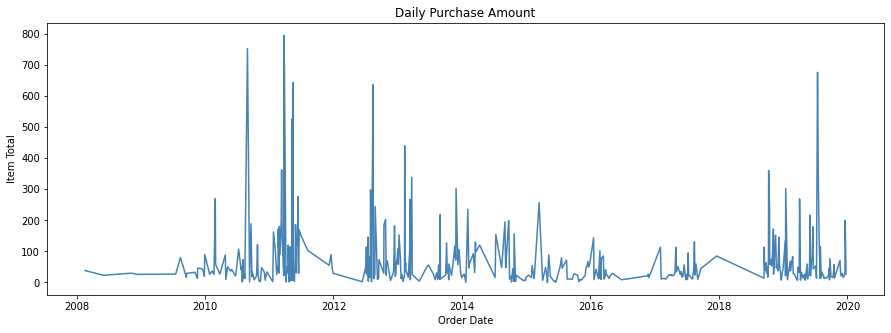

In [122]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_DateTotal.index, df_DateTotal.values, color = 'steelblue')
ax.set_xlabel('Order Date')
ax.set_ylabel('Item Total')
ax.set_title('Daily Purchase Amount')
plt.show()
#ax.figure.savefig('./img/DailyPurchaseAmount.png', bbox_inches='tight', dpi=150)

In [123]:
# Use groupby to sum taxes by date

df_DateTax = df[['OrderDate', 'Tax']]
df_DateTax = df_DateTax.groupby('OrderDate')
df_DateTax = df_DateTax['Tax'].sum()
df_DateTax

OrderDate
2008-02-19    0.00
2008-06-03    0.00
2008-11-06    0.00
2008-12-13    0.00
2009-07-18    0.00
              ... 
2019-12-13    1.46
2019-12-14    1.45
2019-12-18    1.79
2019-12-19    0.00
2019-12-24    0.00
Name: Tax, Length: 445, dtype: float64

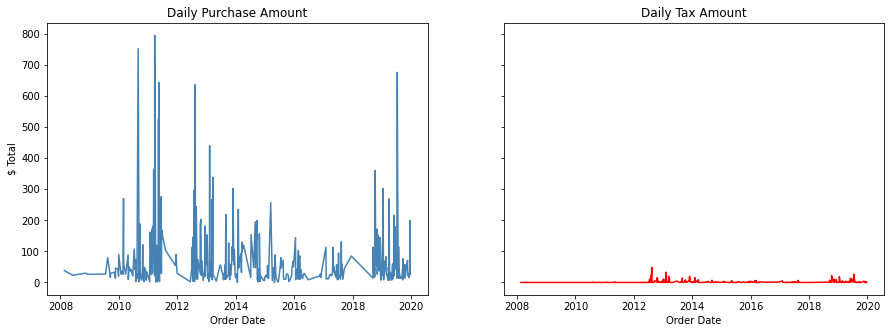

In [124]:
# Plot OrderDate and ItemTotal and OrderDate and Tax

fig,ax = plt.subplots(1,2, sharey = True, figsize = (15,5))

ax[0].plot(df_DateTotal.index, df_DateTotal.values, color = 'steelblue')
ax[1].plot(df_DateTax.index, df_DateTax.values, color = 'red')

ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('$ Total')
ax[1].set_xlabel('Order Date')

ax[0].set_title('Daily Purchase Amount')
ax[1].set_title('Daily Tax Amount')

plt.show()

In [125]:
# The previous graphs contained too much data since they were being plotted for each day. 
# Grouping will allow the information to be more legible.

# Purchases by Year 

df_OrderYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_OrderYear = df_OrderYear.sort_values('OrderDate')
df_OrderYear = df_OrderYear.groupby('OrderYear')
df_OrderYear = df_OrderYear['ItemTotal'].sum()
print(df_OrderYear)

OrderYear
2008     117.09
2009     456.85
2010    2421.77
2011    7176.93
2012    3651.85
2013    3689.19
2014    2075.99
2015    1257.52
2016     823.48
2017    1392.77
2018    2689.12
2019    4604.85
Name: ItemTotal, dtype: float64


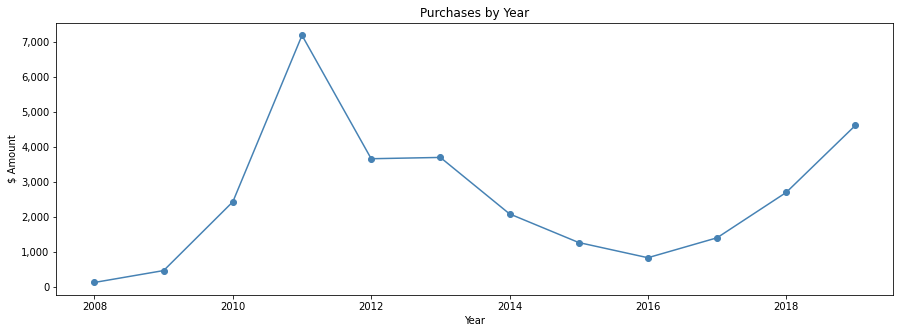

In [126]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(df_OrderYear.index, df_OrderYear.values, color = 'steelblue', marker = 'o')
ax.set_title('Purchases by Year')

# x-axis
ax.set_xlabel('Year')

# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

plt.show()

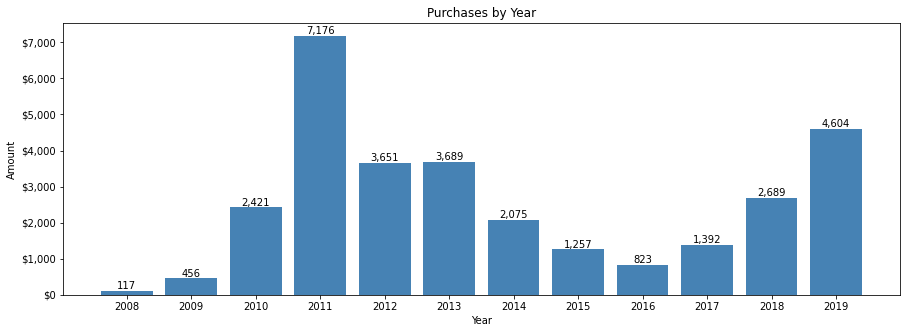

In [127]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(df_OrderYear.index, df_OrderYear.values, color = 'steelblue')
ax.set_title('Purchases by Year')

# x-axis
ax.set_xlabel('Year')
plt.xticks([x for x in df_OrderYear.index], rotation = 0)

# y-axis
ax.set_ylabel('Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: '$'+format(int(y), ','))
)

# labels
for i,j in zip(df_OrderYear.index, df_OrderYear.values):
    ax.annotate(format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()
#ax.figure.savefig('./img/PurchasesByYear.png', bbox_inches='tight', dpi=150)

In [128]:
# Purchases by Month

df_OrderMonth = df[['OrderDate', 'ItemTotal', 'OrderMonth']]
df_OrderMonth = df_OrderMonth.sort_values('OrderDate')
df_OrderMonth = df_OrderMonth.groupby('OrderMonth')
df_OrderMonth = df_OrderMonth['ItemTotal'].sum()
df_OrderMonth

OrderMonth
1     1435.93
2     3082.08
3     4439.17
4     1497.22
5     2198.31
6     2042.64
7     3352.54
8     3507.65
9     1887.06
10    2392.95
11    2187.99
12    2333.87
Name: ItemTotal, dtype: float64

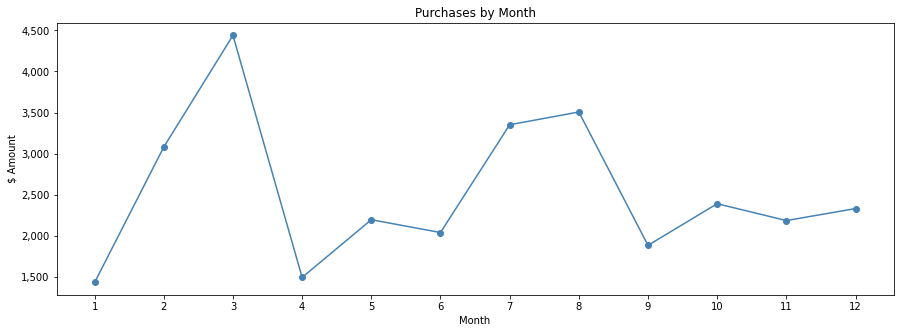

In [129]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df_OrderMonth.index, df_OrderMonth.values, color = 'steelblue', marker = 'o')
ax.set_title('Purchases by Month')

# x-axis
ax.set_xlabel('Month')
plt.xticks([x for x in df_OrderMonth.index])

# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

plt.show()

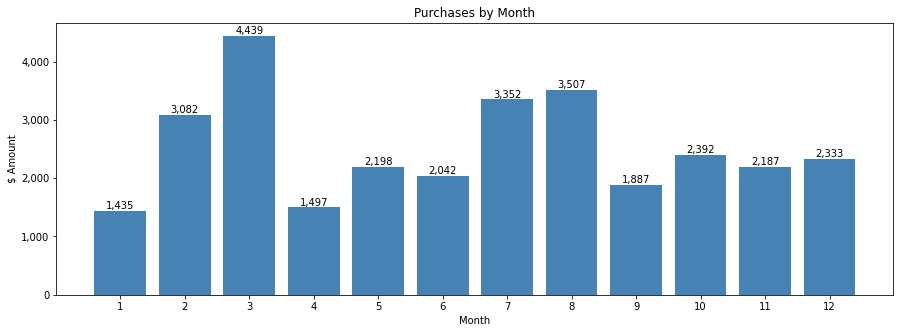

In [130]:
fig, ax = plt.subplots(figsize = (15,5))
ax.bar(df_OrderMonth.index, df_OrderMonth.values, color = 'steelblue')
ax.set_title('Purchases by Month')

# x-axis
ax.set_xlabel('Month')
plt.xticks([x for x in df_OrderMonth.index])

# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

# labels
for i,j in zip(df_OrderMonth.index, df_OrderMonth.values):
    ax.annotate(format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()

In [169]:
# Add month names

df_OrderMonthName = df[['OrderDate', 'OrderMonth', 'ItemTotal']]
df_OrderMonthName = df_OrderMonthName.sort_values('OrderDate')
df_OrderMonthName['MonthName'] = df_OrderMonthName['OrderDate'].dt.strftime("%b")
df_OrderMonthName = df_OrderMonthName.groupby(['OrderMonth','MonthName'], as_index = False)
df_OrderMonthName = df_OrderMonthName['ItemTotal'].sum()
df_OrderMonthName

,OrderMonth,MonthName,ItemTotal
0,1,Jan,1435.93
1,2,Feb,3082.08
2,3,Mar,4439.17
3,4,Apr,1497.22
4,5,May,2198.31
5,6,Jun,2042.64
6,7,Jul,3352.54
7,8,Aug,3507.65
8,9,Sep,1887.06
9,10,Oct,2392.95


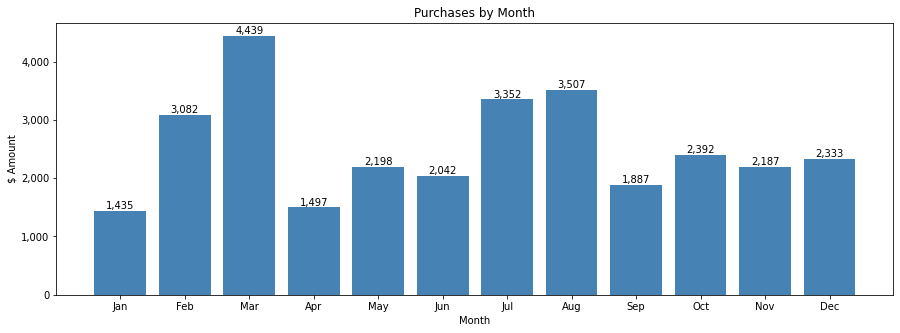

In [170]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(df_OrderMonthName.MonthName, df_OrderMonthName.ItemTotal, color = 'steelblue')
ax.set_title('Purchases by Month')

# x-axis
ax.set_xlabel('Month')
plt.xticks([x for x in df_OrderMonthName.MonthName])

# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

# labels
for i,j in zip(df_OrderMonthName.MonthName, df_OrderMonthName.ItemTotal):
    ax.annotate(format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()
#ax.figure.savefig('./img/PurchasesByMonth.png', bbox_inches='tight', dpi=150)

In [133]:
# Transactions by Year

df_TransYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_TransYear = df_TransYear.groupby('OrderYear')
df_TransYear = df_TransYear['ItemTotal'].size()
df_TransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
Name: ItemTotal, dtype: int64

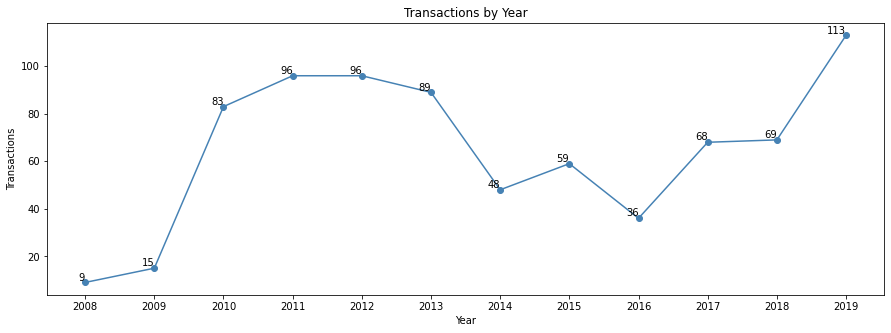

In [134]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(df_TransYear.index, df_TransYear.values, color = 'steelblue', marker = 'o')
ax.set_title('Transactions by Year')

# x-axis
ax.set_xlabel('Year')
plt.xticks([x for x in df_TransYear.index])

# y-axis
ax.set_ylabel('Transactions')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

# labels
for i,j in zip(df_TransYear.index, df_TransYear.values):
    ax.annotate(format(int(j)), xy=(i,j), va='bottom', ha='right')

plt.show()
#ax.figure.savefig('./img/TransactionsByYear.png', bbox_inches='tight', dpi=150)

In [135]:
# Transactions by Seller

df_TransSeller = df[['Seller']]
df_TransSeller = df_TransSeller.groupby(df_TransSeller['Seller'] == 'Amazon')
df_TransSeller = df_TransSeller.size()
df_TransSeller

Seller
False    326
True     455
dtype: int64

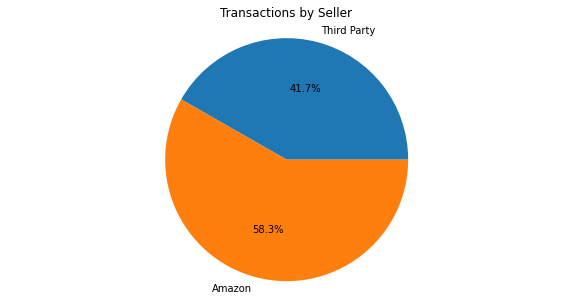

In [136]:
fig,ax = plt.subplots(figsize = (10,5))
ax.pie(df_TransSeller.values, labels = ['Third Party', 'Amazon'], autopct = '%1.1f%%')
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

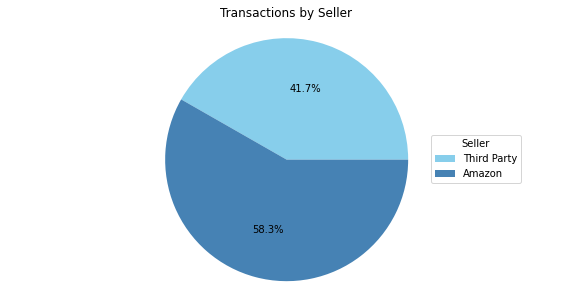

In [137]:
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(df_TransSeller.values, autopct = '%1.1f%%', colors = ['skyblue', 'steelblue'] )
ax.legend(
    #df_TransSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (0.75,0,0.5,1)
)
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/TransactionsBySeller.png', bbox_inches='tight', dpi=150)

In [138]:
# Purchases by Seller

df_PurchasesSeller = df[['Seller', 'ItemTotal']]
df_PurchasesSeller = df_PurchasesSeller.groupby(df_PurchasesSeller['Seller'] == 'Amazon')
df_PurchasesSeller = df_PurchasesSeller['ItemTotal'].sum()
df_PurchasesSeller

Seller
False     7289.76
True     23067.65
Name: ItemTotal, dtype: float64

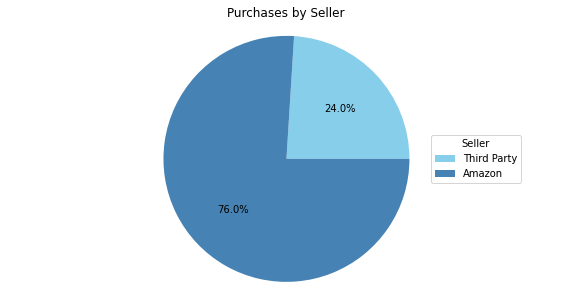

In [139]:
fig,ax = plt.subplots(figsize = (10,5))
ax.pie(df_PurchasesSeller.values, autopct = '%1.1f%%', colors = ['skyblue', 'steelblue'])
ax.legend(
    #df_PurchasesSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (0.75,0,0.5,1)    
)
ax.set_title('Purchases by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/PurchasesBySeller.png', bbox_inches='tight', dpi=150)

In [36]:
# Purchases by Category
# Note: it is necessary to sort by reverse in the df so the plot can be arranged alphabetically
# from top to bottom

df_CategoryTotal = df[['Category', 'ItemTotal']]
df_CategoryTotal = df_CategoryTotal.groupby('Category')
df_CategoryTotal = df_CategoryTotal['ItemTotal'].sum()
df_CategoryTotal = df_CategoryTotal.sort_index(ascending = False)
df_CategoryTotal

Category
Unknown              2092.30
Sports & Outdoor      831.09
Other                1481.07
Office                504.44
Home                 2215.82
Health & Beauty      3059.04
Grocery               481.91
Entertainment          61.16
Electronics          4208.20
Computer            10519.35
Books                1519.07
Auto & Tools          533.80
Apparel              2850.16
Name: ItemTotal, dtype: float64

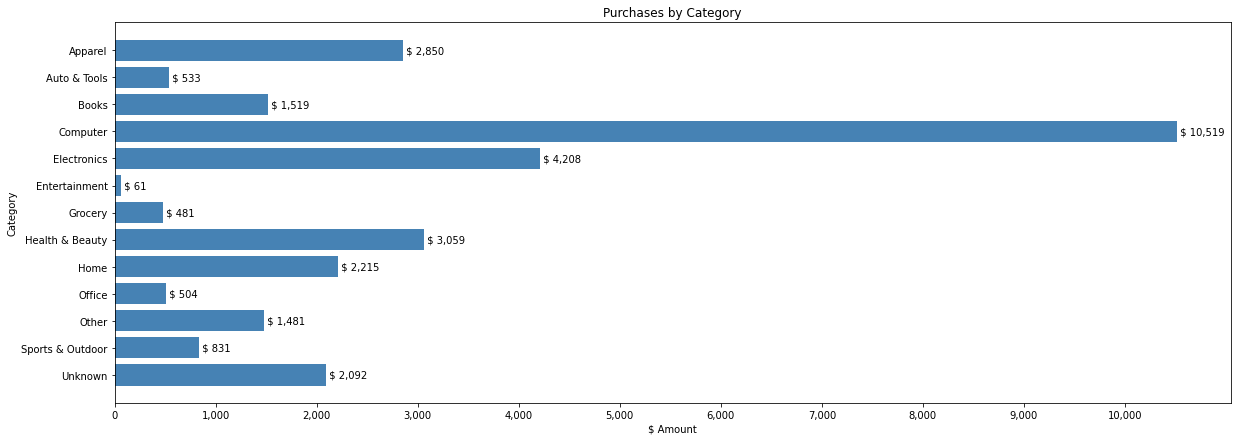

In [72]:
# Plot purchases by category

fig,ax = plt.subplots(figsize = (20,7))
ax.barh(df_CategoryTotal.index, df_CategoryTotal.values, color = 'steelblue')
ax.set_title('Purchases by Category')

# x-axis
ax.set_xlabel('$ Amount')
plt.xticks([x for x in range(0, round(max(df_CategoryTotal.values)), 1000)])
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x,p: format(int(x), ','))
)

# y-axis
ax.set_ylabel('Category')

# labels
for i,j in zip(df_CategoryTotal.index, df_CategoryTotal.values):
    ax.annotate(' $ '+format(int(j), ','), xy=(j,i), va='center', ha='left')

plt.show()
#ax.figure.savefig('./img/PurchasesByCategory.png', bbox_inches='tight', dpi=150)

In [49]:
# Purchases by category share

df_CategoryShare = df[['Category', 'ItemTotal']]
df_CategoryShare = df_CategoryShare.groupby('Category', as_index = False)
df_CategoryShare = df_CategoryShare['ItemTotal'].sum()
df_CategoryShare['Share'] = df_CategoryShare['ItemTotal'].div(df_CategoryShare['ItemTotal'].sum())*100
df_CategoryShare = df_CategoryShare.sort_values('Category', ascending = False)
df_CategoryShare

,Category,ItemTotal,Share
12,Unknown,2092.30,6.892222
11,Sports & Outdoor,831.09,2.737684
10,Other,1481.07,4.878776
9,Office,504.44,1.661670
8,Home,2215.82,7.299108
7,Health & Beauty,3059.04,10.076749
6,Grocery,481.91,1.587454
5,Entertainment,61.16,0.201466
4,Electronics,4208.20,13.862184
3,Computer,10519.35,34.651672


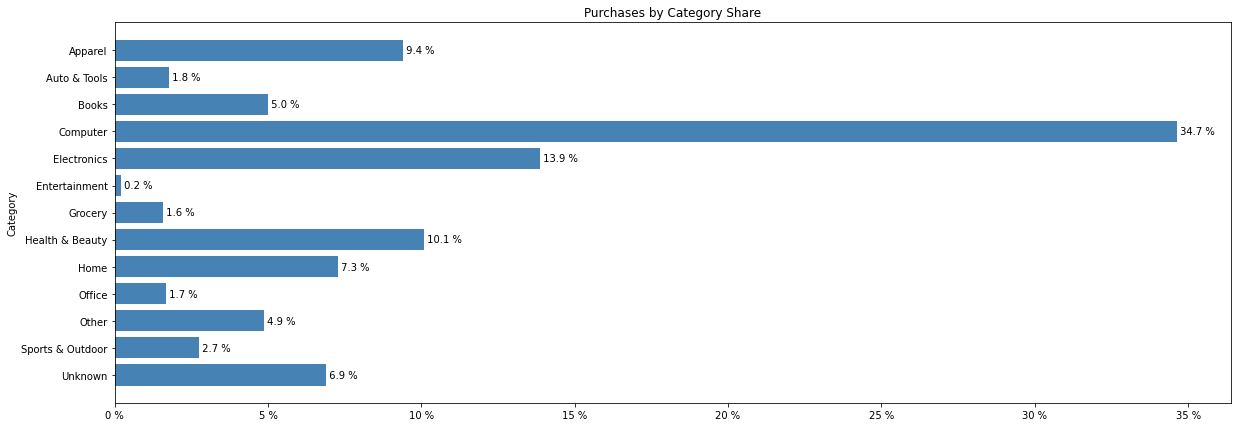

In [74]:
# Plot purchases by category share

fig,ax = plt.subplots(figsize = (20,7))
ax.barh(df_CategoryShare['Category'],df_CategoryShare['Share'], color = 'steelblue')
ax.set_title('Purchases by Category Share')

# x-axis
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x,p: format(int(x))+ ' %')
)

# y-axis
ax.set_ylabel('Category')

# labels
for i,j in zip(df_CategoryShare.Category, df_CategoryShare.Share):
    ax.annotate(' '+format(round(j, 1))+' %', xy=(j,i), va='center', ha='left')

plt.show()
#ax.figure.savefig('./img/PurchasesByCategoryShare.png', bbox_inches='tight', dpi=150)

In [76]:
# Purchases by day of week

df_DayPur = df[['OrderDayIndex','OrderDayName','ItemTotal']]
df_DayPur = df_DayPur.groupby(['OrderDayName','OrderDayIndex'], as_index = False)
df_DayPur = df_DayPur['ItemTotal'].sum()
df_DayPur = df_DayPur.sort_values('OrderDayIndex')
df_DayPur

,OrderDayName,OrderDayIndex,ItemTotal
1,Monday,0,6787.06
5,Tuesday,1,4378.23
6,Wednesday,2,3476.16
4,Thursday,3,4260.84
0,Friday,4,4073.42
2,Saturday,5,2965.26
3,Sunday,6,4416.44


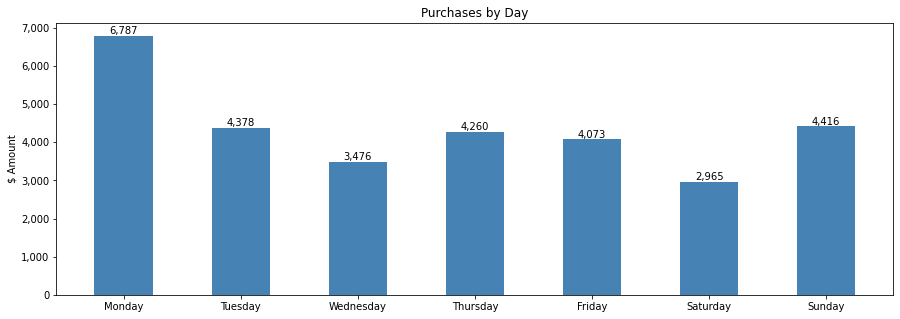

In [79]:
# Plot purchases by day of week

fig,ax = plt.subplots(figsize = (15,5))
ax.bar(df_DayPur['OrderDayName'],df_DayPur['ItemTotal'], color = 'steelblue', width = .50)
ax.set_title('Purchases by Day')

# x-axis
plt.xticks(rotation = 0)

# y-axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: format(int(y), ','))
)

# labels
for i,j in zip(df_DayPur['OrderDayName'], df_DayPur['ItemTotal']):
    ax.annotate(format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()
#ax.figure.savefig('./img/PurchasesByDay.png', bbox_inches='tight', dpi=150)

In [73]:
# Avg transaction value by year

df_YearAvgTrans = df[['OrderYear','ItemTotal']]
df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)
df_YearAvgTrans = df_YearAvgTrans['ItemTotal'].sum()
df_YearAvgTrans

,OrderYear,ItemTotal
0,2008,117.09
1,2009,456.85
2,2010,2421.77
3,2011,7176.93
4,2012,3651.85
5,2013,3689.19
6,2014,2075.99
7,2015,1257.52
8,2016,823.48
9,2017,1392.77


In [74]:
df_NumTransYear = df[['OrderYear', 'OrderID']].groupby('OrderYear').size()
df_NumTransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
dtype: int64

In [75]:
df_YearAvgTrans['Trans'] = df_NumTransYear.values
df_YearAvgTrans

,OrderYear,ItemTotal,Trans
0,2008,117.09,9
1,2009,456.85,15
2,2010,2421.77,83
3,2011,7176.93,96
4,2012,3651.85,96
5,2013,3689.19,89
6,2014,2075.99,48
7,2015,1257.52,59
8,2016,823.48,36
9,2017,1392.77,68


In [76]:
df_YearAvgTrans['AvgPerTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans']).round(2)
df_YearAvgTrans

,OrderYear,ItemTotal,Trans,AvgPerTrans
0,2008,117.09,9,13.01
1,2009,456.85,15,30.46
2,2010,2421.77,83,29.18
3,2011,7176.93,96,74.76
4,2012,3651.85,96,38.04
5,2013,3689.19,89,41.45
6,2014,2075.99,48,43.25
7,2015,1257.52,59,21.31
8,2016,823.48,36,22.87
9,2017,1392.77,68,20.48


In [77]:
# All of the above can be done more quickly using the following:

#df_YearAvgTrans = df[['OrderYear','ItemTotal']]
#df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)['ItemTotal'].sum()

#df_YearOrders = df[['OrderYear','ItemTotal']].groupby('OrderYear')['ItemTotal'].size()
#df_YearAvgTrans['Trans'] = df_YearOrders.values

#df_YearAvgTrans['AvgTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans'])
#df_YearAvgTrans

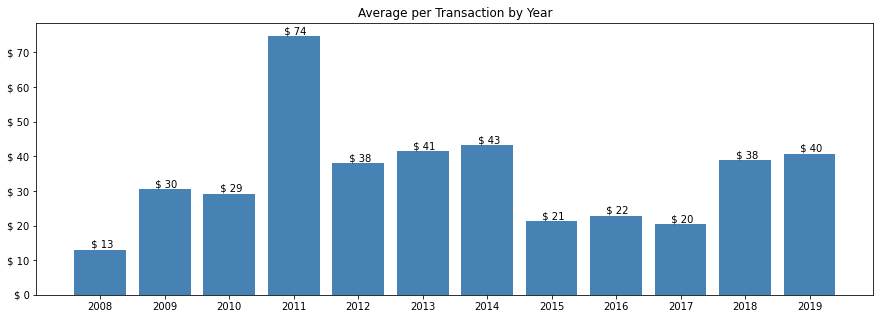

In [89]:
# Plot average per transaction by year

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(df_YearAvgTrans['OrderYear'],df_YearAvgTrans['AvgPerTrans'], color = 'steelblue')
ax.set_title('Average per Transaction by Year')

# x-axis
plt.xticks([x for x in df_YearAvgTrans['OrderYear']], rotation = 0)
    
# y-axis
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: '$ '+format(int(y), ','))
)

# labels
for i,j in zip(df_YearAvgTrans['OrderYear'], df_YearAvgTrans['AvgPerTrans']):
    ax.annotate(' $ '+format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()
#ax.figure.savefig('./img/AveragePerTransPerYear.png', bbox_inches='tight', dpi=150)

In [79]:
# Shipping method

df_Carriers = df['Carrier']
CarrierVC = df_Carriers.value_counts()
CarrierVC = CarrierVC.sort_index(ascending = False)
CarrierVC

USPS                    273
UPS Mail Innovations      5
UPS                     170
Other                    98
FedEx SmartPost           4
FedEx                    22
DHL                       9
AMZN                    200
Name: Carrier, dtype: int64

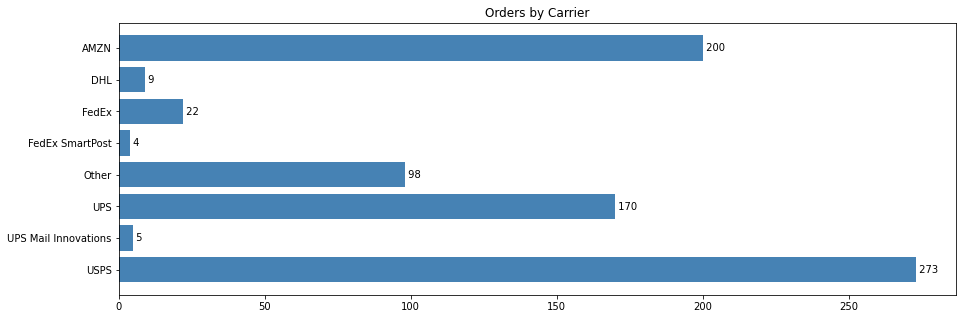

In [97]:
# Plot of shipping method

fig,ax = plt.subplots(figsize = (15, 5))
ax.barh(CarrierVC.index, CarrierVC.values, color = 'steelblue')
ax.set_title('Orders by Carrier')

# labels
for i,j in zip(CarrierVC.index, CarrierVC.values):
    ax.annotate(' '+format(int(j), ','), xy=(j,i), va='center', ha='left')

plt.show()
#ax.figure.savefig('./img/ShippingMethod.png', bbox_inches='tight', dpi=150)

In [94]:
# Shipping method and avg transaction cost

df_CarrierTotal = df[['Carrier', 'ItemTotal']]
df_CarrierTotal = df_CarrierTotal.groupby('Carrier', as_index = False)['ItemTotal'].sum()

df_CarrierTrans = df[['Carrier', 'ItemTotal']].groupby('Carrier')['ItemTotal'].size()
df_CarrierTotal['NumTrans'] = df_CarrierTrans.values

df_CarrierTotal['AvgPerTrans'] = df_CarrierTotal['ItemTotal'].div(df_CarrierTotal['NumTrans']).round(2)

df_CarrierTotal = df_CarrierTotal.sort_values('Carrier', ascending = False)
df_CarrierTotal

,Carrier,ItemTotal,NumTrans,AvgPerTrans
7,USPS,6594.03,273,24.15
6,UPS Mail Innovations,57.62,5,11.52
5,UPS,10874.11,170,63.97
4,Other,4113.09,98,41.97
3,FedEx SmartPost,100.26,4,25.06
2,FedEx,1948.20,22,88.55
1,DHL,89.71,9,9.97
0,AMZN,6580.39,200,32.90


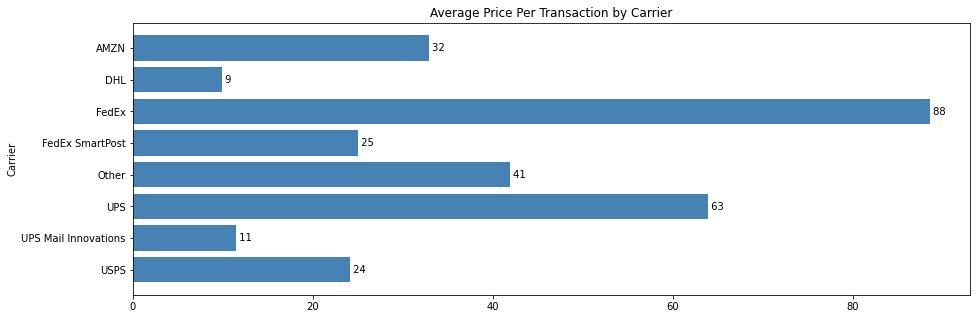

In [99]:
# Plot shipping method and avg transaction cost

fig,ax = plt.subplots(figsize = (15,5))
ax.barh(df_CarrierTotal['Carrier'], df_CarrierTotal['AvgPerTrans'], color = 'steelblue')
ax.set_title('Average Price Per Transaction by Carrier')

# x-axis
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(' $'+format(int()))
)

# labels
for i,j in zip(df_CarrierTotal.Carrier, df_CarrierTotal.AvgPerTrans):
    ax.annotate(' '+format(int(j), ','), xy=(j,i), va='center', ha='left')

plt.show()
ax.figure.savefig('./img/ShippingMethodPrice.png', bbox_inches='tight', dpi=150)

## <a id='section4'>4. Data Analysis Using SQL</a>

<a href='#home'>Home</a>

In [156]:
# Recall that in Part 2, we created an engine to connect to our SQL database.
# Below, we show that instead of manipulating data via a Pandas DataFrame, we can do that in SQL first
# and then create Pandas DataFrame with the manipulated data.

In [157]:
tables = engine.execute('SHOW TABLES')
tables

In [158]:
tables = [x for x in tables]
tables

[('purchases',),
 ('purchases2',),
 ('purchases_airflow',),
 ('purchases_airflow_aws',)]

In [159]:
# Confirm data was populated correctly 

purchases = engine.execute('select * from purchases')
#for i in purchases:
#    print(i)

# or

#engine.execute("SELECT * FROM purchases2").fetchall()

In [160]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = engine.execute('SELECT SUM(ItemTotal) FROM purchases')
TotalSpent = [row for row in TotalSpent]
for i in TotalSpent[0]: print(i)

30357.41


In [161]:
# Total number of transactions

TotalTrans = engine.execute('SELECT COUNT(*) FROM purchases')
TotalTrans = [row for row in TotalTrans]
for i in TotalTrans[0]: print(i)

781


In [162]:
# Average spent

AverageSpent = 30357.41/781
AverageSpent

38.86992317541613

In [163]:
# Use groupby to sum purchases by date

OrderDate_ItemTotal = engine.execute('SELECT OrderDate, sum(ItemTotal) FROM purchases GROUP BY OrderDate')
OrderDate_ItemTotal = [row for row in OrderDate_ItemTotal]
df_OrderDate_ItemTotal = pd.DataFrame.from_records(OrderDate_ItemTotal)
df_OrderDate_ItemTotal.columns = ['OrderDate', 'ItemTotal']
df_OrderDate_ItemTotal

,OrderDate,ItemTotal
0,2008-02-19,38.24
1,2008-06-03,23.09
2,2008-11-06,29.86
3,2008-12-13,25.90
4,2009-07-18,26.97
...,...,...
440,2019-12-13,23.45
441,2019-12-14,23.33
442,2019-12-18,28.77
443,2019-12-19,200.00


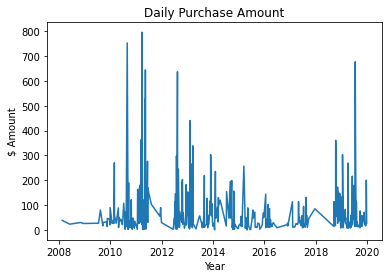

In [164]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots()
ax.plot(df_OrderDate_ItemTotal['OrderDate'], df_OrderDate_ItemTotal['ItemTotal'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Daily Purchase Amount')
plt.show()

In [165]:
# Purchases by year 

OrderYear_ItemTotal = engine.execute('SELECT OrderYear, SUM(ItemTotal) FROM purchases GROUP BY OrderYear')
OrderYear_ItemTotal = [row for row in OrderYear_ItemTotal]
df_OrderYear_ItemTotal = pd.DataFrame.from_records(OrderYear_ItemTotal)
df_OrderYear_ItemTotal.columns = ['OrderYear', 'SumItemTotal']
df_OrderYear_ItemTotal

,OrderYear,SumItemTotal
0,2008,117.09
1,2009,456.85
2,2010,2421.77
3,2011,7176.93
4,2012,3651.85
5,2013,3689.19
6,2014,2075.99
7,2015,1257.52
8,2016,823.48
9,2017,1392.77


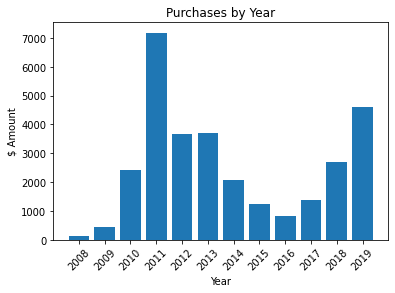

In [166]:
# Plot purchases by year

fig,ax = plt.subplots()
ax.bar(df_OrderYear_ItemTotal['OrderYear'], df_OrderYear_ItemTotal['SumItemTotal'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.xticks([x for x in df_OrderYear_ItemTotal['OrderYear']], rotation = 45)
plt.show()

<a href='#home'>Home</a>